#### Exercise 1
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [1]:
import pandas as pd


In [2]:
taxi_data = pd.read_csv('/workspaces/student-weekly-1-rodwavejr/part-2/data/2019_Yellow_Taxi_Trip_Data.csv')

summary_stats = taxi_data[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()
summary_stats


,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 2
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [3]:
longest_trip = taxi_data.loc[taxi_data['trip_distance'].idxmax(), ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']]
longest_trip

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object

#### Exercise 3
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [4]:
meteorite_data = pd.read_csv('/workspaces/student-weekly-1-rodwavejr/part-2/data/Meteorite_Landings.csv')

### Rename the 'mass (g)' ###
meteorite_data = meteorite_data.rename(columns={'mass (g)': 'mass'})
meteorite_data = meteorite_data.drop(columns=['reclat', 'reclong'])

### mass in descending order ###
sorted_meteorites = meteorite_data.sort_values(by='mass', ascending=False)
sorted_meteorites

,name,id,nametype,recclass,mass,fall,year,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM,"(-19.58333, 17.91667)"
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM,"(76.13333, -64.93333)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM,"(-27.46667, -60.58333)"
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM,"(35.05, -111.03333)"
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM,"(47.0, 88.0)"
...,...,...,...,...,...,...,...,...
38282,Wei-hui-fu (a),24231,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM,NaN
38283,Wei-hui-fu (b),24232,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM,NaN
38285,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,01/01/1978 12:00:00 AM,"(35.26667, 104.31667)"
41472,Yamato 792768,28117,Valid,CM2,NaN,Found,01/01/1979 12:00:00 AM,"(-71.5, 35.66667)"


#### Exercise 4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [5]:
import numpy as np

# Read the CSV file
meteorite_data = pd.read_csv('/workspaces/student-weekly-1-rodwavejr/part-2/data/Meteorite_Landings.csv')

## handle nulls
meteorite_data['year'] = meteorite_data['year'].fillna('0')
meteorite_data['year'] = meteorite_data['year'].astype(str)

## split dates
meteorite_data['year'] = meteorite_data['year'].str.split('/').str[0]

## convert to int
meteorite_data['year'] = pd.to_numeric(meteorite_data['year'], errors='coerce').fillna(0).astype(int)

## flag old ones
meteorite_data['before_1970'] = meteorite_data['year'] < 1970

## get ids we want
target_ids = range(10036, 10041)
subset = meteorite_data[meteorite_data['id'].isin(target_ids)]

print(subset)

            name     id nametype         recclass  mass (g)   fall  year  \
282        Enshi  10038    Valid               H5    8000.0   Fell     1   
283    Ensisheim  10039    Valid              LL6  127000.0   Fell    12   
11650     Enigma  10036    Valid               H4      94.0  Found     1   
11651       Enon  10037    Valid  Iron, ungrouped     763.0  Found     1   

         reclat    reclong            GeoLocation  before_1970  
282    30.30000  109.50000          (30.3, 109.5)         True  
283    47.86667    7.35000       (47.86667, 7.35)         True  
11650  31.33333  -82.31667  (31.33333, -82.31667)         True  
11651  39.86667  -83.95000     (39.86667, -83.95)         True  


#### Exercise 5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [8]:
## convert dropoff to datetime
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

## set dropoff as index
taxi_data = taxi_data.set_index('tpep_dropoff_datetime')

## resample hourly and sum
hourly_stats = taxi_data.resample('H').agg({
    'trip_distance': 'sum',
    'fare_amount': 'sum',
    'tolls_amount': 'sum',
    'tip_amount': 'sum'
})

## find top 5 tips
top_tips = hourly_stats.nlargest(5, 'tip_amount')

print("Top 5 hours with highest tips:")
print(top_tips)

Top 5 hours with highest tips:
                       trip_distance  fare_amount  tolls_amount  tip_amount
tpep_dropoff_datetime                                                      
2019-10-23 16:00:00         10676.95     67797.76        699.04    12228.64
2019-10-23 17:00:00         16052.83     70131.91       4044.04    12044.03
2019-10-23 18:00:00          3104.56     11565.56       1454.67     1907.64
2019-10-23 15:00:00            14.34       213.50          0.00       51.75
2019-10-23 19:00:00            98.59       268.00         24.48       25.74


/tmp/ipykernel_13912/759786124.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_stats = taxi_data.resample('H').agg({


#### Exercise 6
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

<Figure size 1000x600 with 0 Axes>

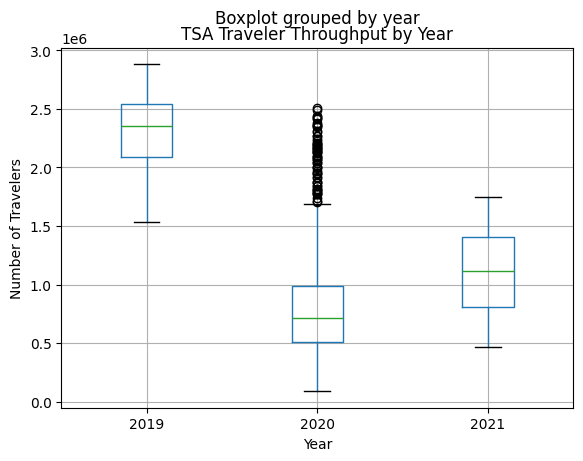

In [11]:
import pandas as pd

import matplotlib.pyplot as plt

## read data
tsa_data = pd.read_csv('/workspaces/student-weekly-1-rodwavejr/part-2/data/tsa_melted_holiday_travel.csv')

## create figure
plt.figure(figsize=(10, 6))

## create box plot
tsa_data.boxplot(column='travelers', by='year')

## labels
plt.title('TSA Traveler Throughput by Year')
plt.xlabel('Year')
plt.ylabel('Number of Travelers')

## show plot
plt.show()

#### Exercise 7
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

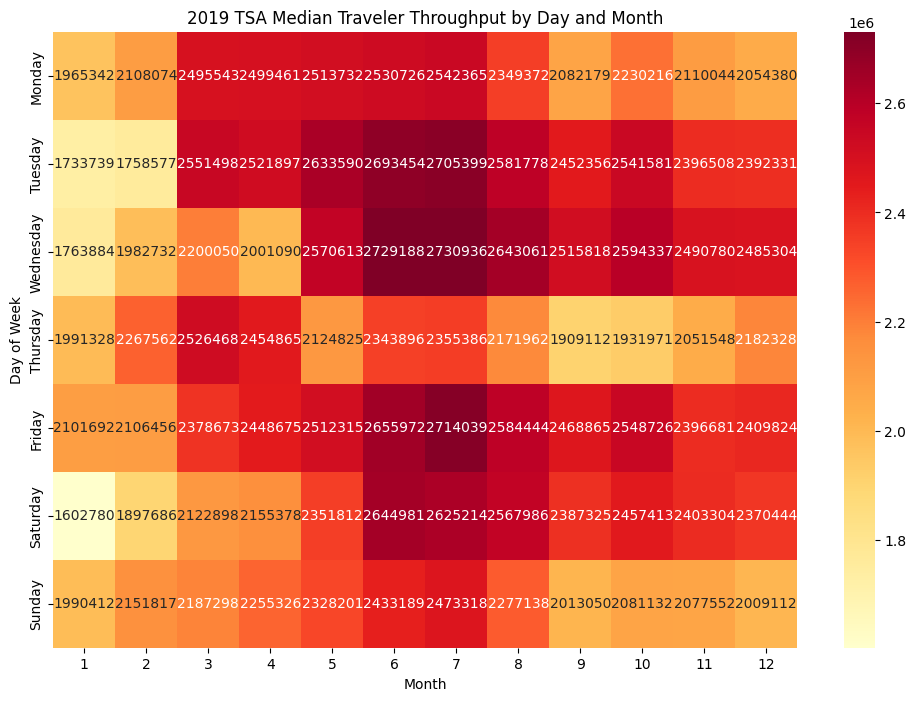

In [12]:
import seaborn as sns

## convert date to datetime
tsa_data['date'] = pd.to_datetime(tsa_data['date'])

## filter for 2019
tsa_2019 = tsa_data[tsa_data['year'] == 2019].copy()

## extract month and day of week
tsa_2019['month'] = tsa_2019['date'].dt.month
tsa_2019['day_of_week'] = tsa_2019['date'].dt.day_name()

## calculate median travelers by month and day
heatmap_data = tsa_2019.pivot_table(
    values='travelers',
    index='day_of_week',
    columns='month',
    aggfunc='median'
)

## set custom order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

## create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.0f',
            cmap='YlOrRd')

## labels
plt.title('2019 TSA Median Traveler Throughput by Day and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')

plt.show()